In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("xdata.csv")
y = pd.read_csv("ydata.csv")

In [3]:
x

,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858
...,...,...,...
394,395,1.389231,2.592584
395,396,-0.352768,0.136461
396,397,0.789626,0.931670
397,398,-1.002530,-0.676162


In [4]:
y

,0,0.0
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
394,395,1.0
395,396,1.0
396,397,1.0
397,398,1.0


In [5]:
x.shape,y.shape

((399, 3), (399, 2))

In [6]:
x_data,y_data = x.values,y.values

In [7]:
y_data.shape

(399, 2)

In [8]:
x_data

array([[ 1.00000000e+00,  3.51627900e+00,  3.71975047e+00],
       [ 2.00000000e+00,  4.60649561e+00,  3.41437943e+00],
       [ 3.00000000e+00,  4.67701056e+00,  3.04724443e+00],
       ...,
       [ 3.97000000e+02,  7.89625683e-01,  9.31669806e-01],
       [ 3.98000000e+02, -1.00253042e+00, -6.76162472e-01],
       [ 3.99000000e+02,  2.92386778e-01,  5.61177823e-01]])

In [11]:
x_data[:,1:].shape

(399, 2)

In [12]:
print(type(x_data))

<class 'numpy.ndarray'>


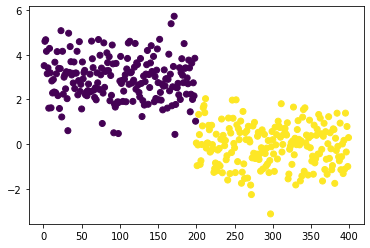

In [14]:
plt.scatter(x_data[:,0],x_data[:,1],c = y_data[:,1].reshape(-1))
plt.show()

In [17]:
def distance_formula(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [18]:
distance_formula(x_data[0],x_data[1])

1.479382391210793

In [60]:
class KNNclassifier:
    def __init__(self,k=5):
        self.k = k
    
    def fit(self,x,y):
        self.x = x
        self.y = y
    
    def distance_formula(p1,p2):
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
    
    def predict(self,p):
        distances = []
        for i in range(len(self.x)):
                distances.append((distance_formula(self.x[i],p),i))
        
        distances = sorted(distances,key = lambda x:x[0])
        points_with_distances = distances[:self.k]
        
        classes = []
        
        for dist,i in points_with_distances:
            classes.append(self.y[i][1])
            
        class_,counts = np.unique(classes, return_counts = True)
#         counts = counts[1:]
        ix = np.argmax(counts)
        pred = {"class":class_[ix] , "prob": np.max(counts)/np.sum(counts)}
#         print(points_with_distances)
#         print(classes)
#         print(class_)
#         print(counts)
#         print(np.max(counts),np.sum(counts))
        return pred

In [67]:
knn_model = KNNclassifier()
knn_model.fit(x_data,y_data)
knn_model.predict(x_data[200])

[(0.0, 200), (1.3637197429713974, 201), (1.426389398577114, 199), (2.822579148470978, 198), (3.044632759313519, 202)]
[1.0, 1.0, 1.0, 0.0, 1.0]
[0. 1.]
[1 4]
4 5


{'class': 1.0, 'prob': 0.8}

In [ ]:
# Splitting
x_train,y_train